In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import chi2

import erlc as e
import dataPipeline as dp
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
dataPipeline = dp.DataPipeline()

In [3]:
data = dataPipeline.loadData(num_sets = 15)

Loading dataset #1
Loading dataset #2
Loading dataset #3
Loading dataset #4
Loading dataset #5
Loading dataset #6
Loading dataset #7
Loading dataset #8
Loading dataset #9
Loading dataset #10
Loading dataset #11
Loading dataset #12
Loading dataset #13
Loading dataset #14
Loading dataset #15
Finished Loading. Final Size = (78377, 129)


In [4]:
X, y = dataPipeline.dataProc(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model

In [5]:
erlc = e.ERLC(X_train = X_train, y_train = y_train)

## Chi Test

In [6]:
final_chi, top_features = erlc.chi_test(X_test, y_test)

In [7]:
final_chi.shape

(37, 116)

## Heatmap of Chi-test result

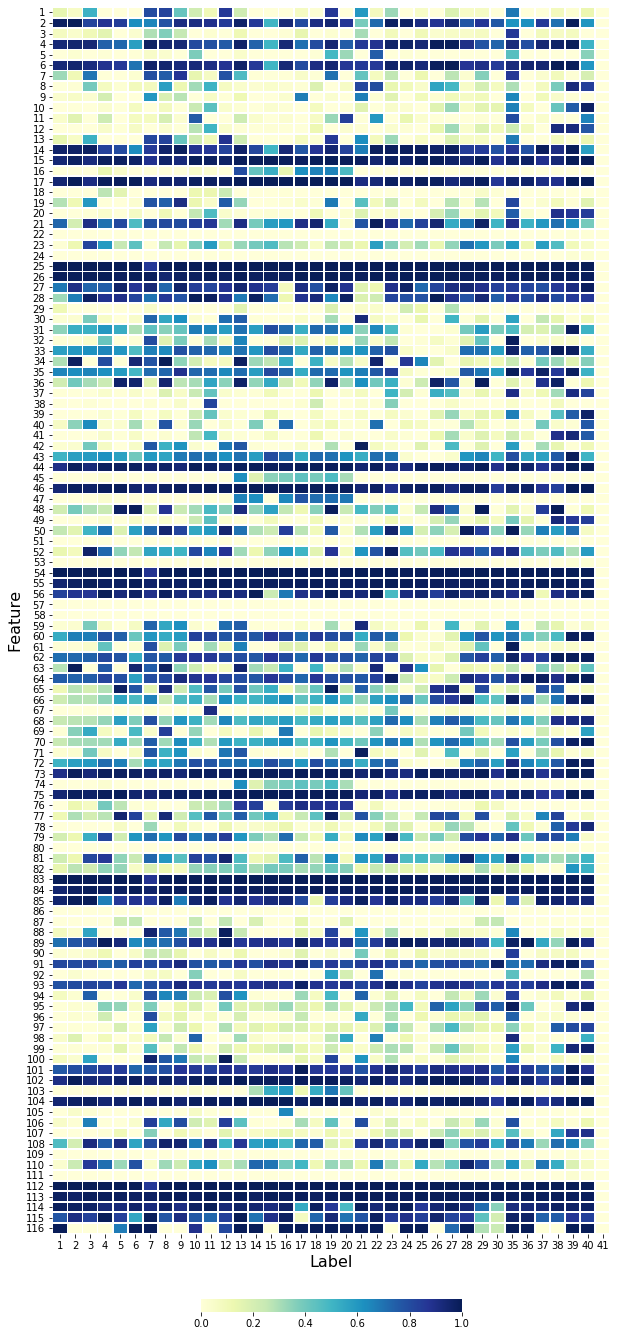

In [8]:
plt.figure(figsize=(10,24))
x_axis_labels = np.unique(y)
y_axis_labels = dataPipeline.getFeatureLabels(data)
sns.heatmap(np.transpose(final_chi), yticklabels = range(1,117),
            xticklabels = x_axis_labels,
            cmap="YlGnBu", 
            cbar_kws={"shrink": 1, "orientation": "horizontal", "pad": 0.05, "fraction": 0.01},
            linewidths = 0.8)
plt.xlabel("Label", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.savefig('output/chi_heatmap.pdf')

In [10]:
top_features

array([[115, 111,  82,  53,  24,  25, 113, 112,   1,  13],
       [111,  82,  53,  24,  16,   1, 101,  62,  84,  25],
       [111,  82,  53,  24,  84,  54,  25,  83, 112,  13],
       [ 24,  25,  82,  53, 111, 114,  55, 112,  74,  45],
       [111,  24,  53,  82,  74,  45,  16, 112,  25,  14],
       [115,  24,  82,  53, 111,  83,  54,  16,  25, 103],
       [115, 114,  25,   3, 112,   5,  83,  54, 103,  72],
       [111,  82,  53,  24,  33, 103, 112,  54,  83,  55],
       [ 53,  82, 111,  24, 112,  83,  13,  45,  74,  25],
       [111,  24,  82,  53,  14,  43,  72,  27,  83,  54],
       [ 53,  82, 111,  24,  83,  54, 113, 112,  45,  74],
       [ 24,  82,  53, 111,  83,  54, 112,  99,  74,  45],
       [115,  16, 103, 101,  24, 114, 111,  25,  53,  82],
       [115,  16, 103,  24,  74,  45,  82,  53, 111,  55],
       [ 74,  16, 103,  45, 111,  53,  82,  24,  14, 112],
       [115,  24, 111,  16,  82,  53, 103,  14,  83,  45],
       [115,  16,  24,  82,  53, 111,  25,  72,  43, 100

## Example of Localization
Here we show how to use the model's localize function to get the infected measurements of a specific sample

In [9]:
score, topN = erlc.localize(X_test[1], y_test[1])

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
score

In [ ]:
topN